<a href="https://colab.research.google.com/github/lonen8188/PythonAI/blob/7-3.Dropout%2CCallback/hg_07_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#신경망 모델 훈련

In [2]:
# <keras.src.callbacks.history.History at 0x7b1adc7f9e70> -> fit()의 History클래스객체의 결과를 반환함
# 노트북의 코드 셀은 pring()를 사용하지 않아도 마지막 라인의 실행결과를 자동으로 출력함
# History 객체는 훈련과정에서 계산한 지표, 즉 손실과 정확도 값이 저장되어 있음 (그래프로 그릴수 있음)

# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [3]:
#손실 곡선
from tensorflow import keras
from sklearn.model_selection import train_test_split

#  =\ 연속적인 한줄이라는 표시 -> 파이썬은 인터프리터로 한둘로 번역함, 노트북마다 1줄 글자수 제한이 있는 경우가 있음
(train_input, train_target), (test_input, test_target) =\
     keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

# MNIST 데이터 셋을 적재하고 훈련 세트와 검증 세트로 나눈 (8:2)
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# 전과 달리 모델을 만드는 간단한 함수를 정의함 (하나의 매개변수를 받아 리턴)
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))

    # model_fn() 함수에 (a_layer 매개변수로) 케라스 층을 추가하면 은닉층 뒤에 하나의 층을 추가함.
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [5]:
# 위에 만든 함수를 실행
model = model_fn()

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit() 메서드 결과를 history 변수에 담아 봄
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)
# 훈련과정 출력을 조절 함
# verbose=0 훈련과정을 나타내지 않음
# verbose=1 기본값, 에포크마다 진행 막대와 함께 손실등의 지표가 출력
# verbose=2 진행막대 빼고 출력

In [7]:
print(history.history.keys())
# 훈련 측정 값이 담겨 있는 history 딕셔너리가 존재함
# 정확도accuracy, 손실loss 값이 있다.

# 정확도는 complie() 메서드의 metrics 매개변수에 accuracy를 추가 했기 때문에 history 속성에 포함되었음

dict_keys(['accuracy', 'loss'])


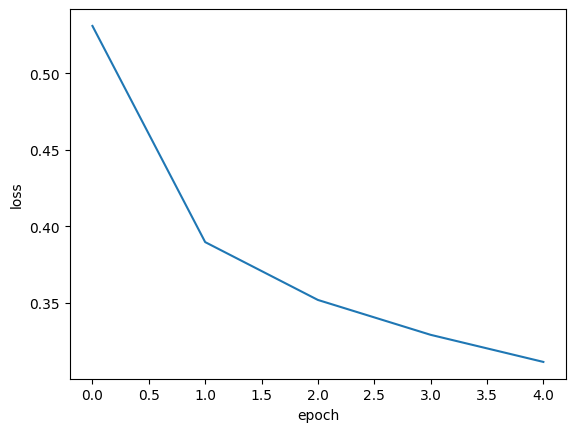

In [9]:
import matplotlib.pyplot as plt
# history속성에 포함된 손실과 정확도는 에포크마다 계산한 값이 순서대로 나열된 단순한 리스트로 맷플롯립으로 쉽게 그래프 처리가 가능
plt.plot(history.history['loss'])
plt.xlabel('epoch')
# 파이썬 인덱스는 0부터 시작함 5개의 에포트가 0~ 4까지 x축에 포현
plt.ylabel('loss') # 손실된 값
plt.show()

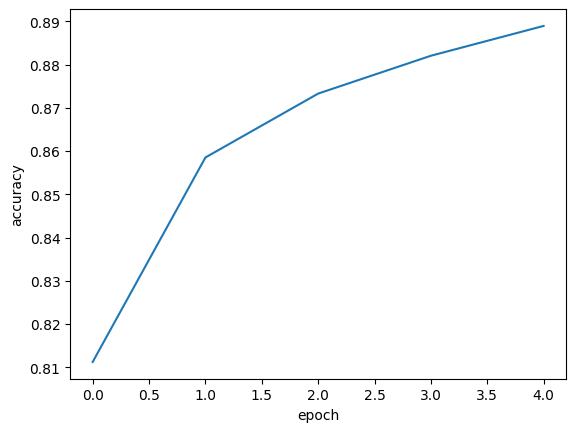

In [10]:
# 이번에는 정확도를 출력
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 결과분석 : 에포크마다 손실이 감소하고 정확도가 향상함

In [11]:
# 이번에는 에포크 횟수를 20번으로 늘려서 모델 훈련 해보자.

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


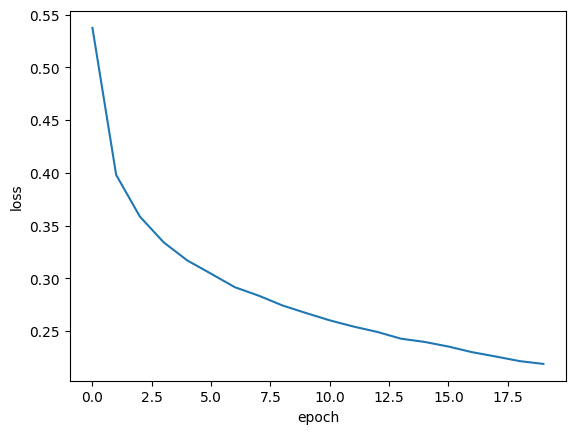

In [12]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
# 손실이 잘 감소됨을 확인 하였지만 약간 조절이 필요하다.

In [ ]:
# 검증손실
# 예전에 확률적 경사 하강법을 사용 했을 때 과대/과소 적합과 에포크 사이에 관계 부분이 있었다.
# 인공 신경망은 모두 일종의 경사 하강법을 사용하기 때문에 동일한 개념이 여기에도 적용됨

# 에포크에 따른 과대적합, 과소적합을 파악하려면 훈련 새트에 대한 점수와 검증 세트에 대한 점수도 필요함
# 그래서 위에처럼 훈련세드와 손실만 그리면 파악이 어렵다.
# 검증 손실을 이용해서 과대/과소 적합을 응용하겠다.

# keypoint
# 손실을 사용하는 것과 정확도를 사용하는 것의 차이는?
# 인공 신경망 모델이 최적화하는 대상은 정확도가 아니라 손실 함수임
# 손실 감소에 비례하여 정확도가 높아지지 않는 경우도 있는데
# 모델이 잘 훈련 되었는지 판단하려면 정확도보다는 손실 함수의 값을 확인하는 것이 더 좋은 방법임

In [13]:
# 에포크 마다 검증 손실을 계산하기 위해 케라스 모델의 fit() 메서드에 검증 데이터를 전달 할 수 있다.
# validation_data 매개변수에 검증에 사용할 입력과 타킷값을 튜플로 만들어 전달 할 것임.

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [14]:
print(history.history.keys())
# 정확도accuracy, 손실loss 값이 있다.
# 추가로 검증세트 정확도 val_accuracy, 검증세트 손실 val_loss가 나옴

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


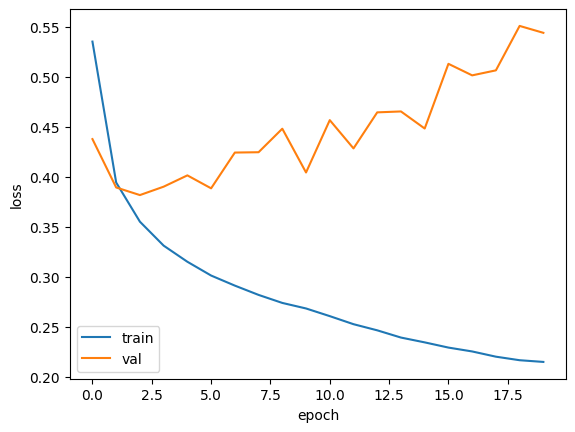

In [15]:
# 과대/과소 적합 문제를 조사하기 위해서 훈련손실, 검증 손실을 한 그래프에 그려서 비교해보자.

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


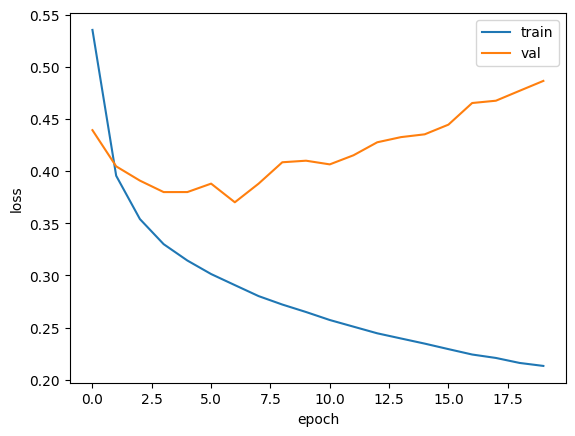

In [18]:
# 결과 분석 : 초기에 검증 손실이 감소하다가 다섯 번째 에포크 만에 다시 상승함
# 훈련 손실은 꾸준히 감소하기 때문에 과대 적합 모델이 만들어 짐
# 검증 손실이 상승하는 시점을 가능한 늦추면 세트에 대한 손실이 줄어들고 검증 세트에 대한 정확도가 증가할 거 같다.

# 과대 적합을 막기 위한 방법으로 예전에 사용했던 규제방식대신에 신경망에 특화된 규제방법(드롭아웃) 을 나중에 해보자.

# 지금은 옵티마이져 하이퍼파라미터를 조절하여 과대 적합을 완화시켜본다.
# RMSprop 옵티마이져는 많은 문제에서 잘~ 동작합니다. -> 다른 방법으로는 Adam이 있죠
model = model_fn()
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

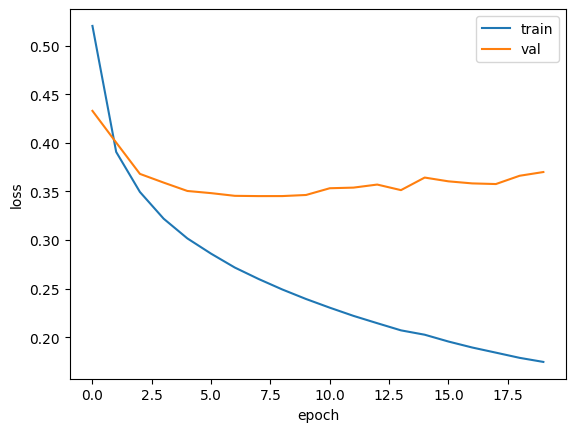

In [17]:
# Adam은 적응적 학습률을 사용하기 때문에 에포크가 진행되면서 학습률의 크기를 조정할 수 있다.
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# Adam이 과대적합이 훨씰 줄었습니다.
# 검증 손실 그래프에서 요동치고 있었던 것이 점점 평준화 됩니다. (10번째까지는 양호)
# 전반적으로 감소함(Adam 최적화가 데이터 셋에 잘 맞으는 거 같음)

# 좀더 개선 해보자 -> 학습률을 조정해서 다시 시도 해볼 수 있을 거 같다. 미션!!!

In [ ]:
# 드롭 아웃 (Dropout)은 딥러닝의 기초가되는 제프리 힌턴이 소개 하였다.
# 이 방식은 훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 (뉴런 출력을 0으로 만듬) 과대 적합을 막음
# 어떤 샘플을 처리할 때 은닉층의 두번째 뉴런이 드롭아웃되어 h2 출력이 없음
# 다른 샘플을 처리 할 때는 은닉층의 첫번째 뉴런이 드롭아둣외어 h1 출력이 없음
# 뉴런은 랜덤하게 드롭아웃 되고 얼마나 많은 뉴런을 드롭할지 우리가 하이퍼파라미터에 정할 것임

# 드롭 아웃이 왜 과대 적합을 막을 수 있을지 생각을 해보면 이전 층의 일부 뉴런이 랜덤하게 꺼지면
# 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 함
# 일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 예측을 만들 수 있는 것

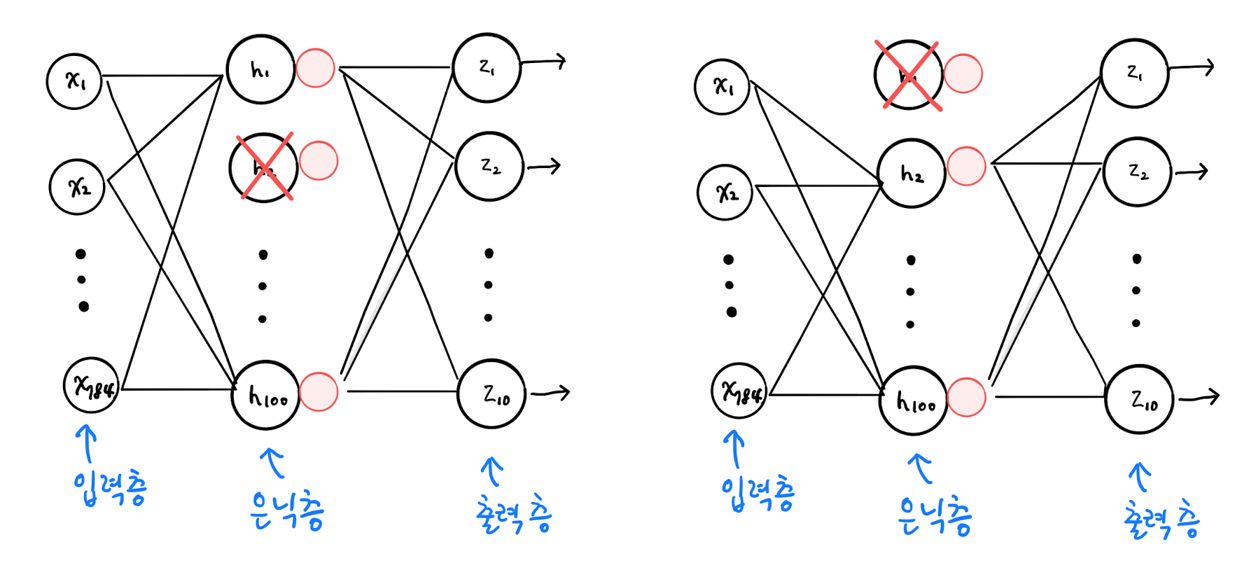

In [21]:
# 또 다른 분석
# 앞의 드롭아웃이 적용된 2개의 신경망 그림을 보면 드롭아웃을 적용해 훈련하는 것은 마치 2개의 신경망을 앙상블하는 것 처럼 상상하게 됨
# 앙상블 : 다 좋은 예측을 만들기 위해 여러 개의 모델을 훈련하는 머신러닝 알고리즘, 과대 적합을 막아주는 좋은 기법
# 케라스에서 드롭아웃을 keras.layers.Dropout로 제공함 (어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만듬)
# 드롭아웃이 층처럼 사용되지만 훈련되는 파라미터는 없음

# model_fn 함수에 드롭 아웃 객체를 전달하여 층을 추가함
model = model_fn(keras.layers.Dropout(0.3)) # 30% 정도 드롭 아웃

model.summary() # 요약 확인
# 은닉층 뒤에 추가된 드롭아웃 층(3번째 값)은 훈련되는 모델 파라미터가 없음
# 입력과 출력의 크기가 같음
# 일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않음.

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

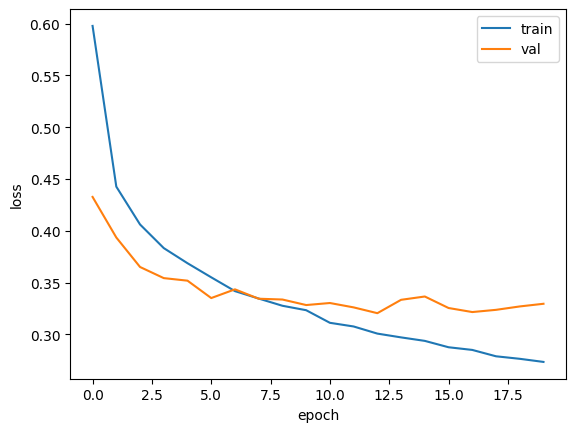

In [22]:
# 주의사항 : 훈련이 끝난뒤 평가나 예측을 수행할 때는 드롭아웃을 적용하지 않는다.
# 훈련된 모든 뉴런을 사용해야 올바른 예측이 수행됨
# 텐서플로와 케라스는 모델을 평가와 예측에 사용할 때 자동으로 드롭아웃을 적용하지 않음

# 훈련 손실과 검증 손실의 그래프를 그려보자.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [24]:
# 과대 적합이 확실이 줄어 듬 10번째 에포크가 검증 손실의 감소가 멈추지만 크게 상승하지 않음
# 20번의 에포크를 실행해서 결국 과대 적합이 되었음 -> 10번만 해보자.

# 차후에 재활용하기 위해서 모델 저장과 복원도 해본다.
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

model.save('model-whole.keras') # 모델 저장

# 케라스 모델은 훈련된 모델의 파라미터를 저장하는 save_weights() 메서드가 있다.
# 텐서플로의 체크포인트 포멧으로 저장하지만 https://www.tensorflow.org/guide/checkpoint?hl=ko
# .h5일 경우 HDF5 포멧으로 저장함 https://geunuk.tistory.com/466

model.save_weights('model.weights.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
!ls -al model*

-rw-r--r-- 1 root root 971928 Nov 11 02:39 model.weights.h5
-rw-r--r-- 1 root root 975720 Nov 11 02:39 model-whole.keras


In [26]:
# 리눅스 셀에 파일을 확인 해봄
!ls -al *.h5

-rw-r--r-- 1 root root 971928 Nov 11 02:39 model.weights.h5


In [27]:
# 실험 1
# 훈련하지 않은 새로운 모델을 만들고 model.weights.h5 파일에서 훈련된 모델 파리미터를 읽어서 사용

# model_fn() 위와 동일한 모델
model = model_fn(keras.layers.Dropout(0.3)) # 훈련하지 않은 새로운 모델

model.load_weights('model.weights.h5') #이전에 저장했던 모델 파라미터를 로딩
# 이때 사용하는 메서드는 save_weight()와 쌍을 이루는 load_weight() 메서드 임
# 주의사항 : load_weights() 메서드를 사용하려면 save_weight() 메서드로 저장했던 모델과 정확히 같은 구조를 가져야함

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
# 모델의 검증 정확도를 확인 해보자.
import numpy as np

# predict() 메서드는 사이킷 런과 다른 샘플마다 10개의 클래스에 대한 확를을 반환 (다중분류)
val_labels = np.argmax(model.predict(val_scaled), axis=-1) # 10개의 확률 중 가장 큰 값의 인덱스를 골라(.argmax) 타킷 레이블과 비교하여 정확도 파악
# axis=-1 배열의 마지막 차원을 따라 최대값을 고름

# 패션 MNIST 데이터셋에서 덜어낸 검증 세트의 샘플수는 12,000개이기 때문에 predict()메서드는 (12000, 10)크기의 배열을 반환

print(np.mean(val_labels == val_target))
# 검증 세트는 2차원 배열이기 때문에 마지막 차원은 1이 됨

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
0.8836666666666667


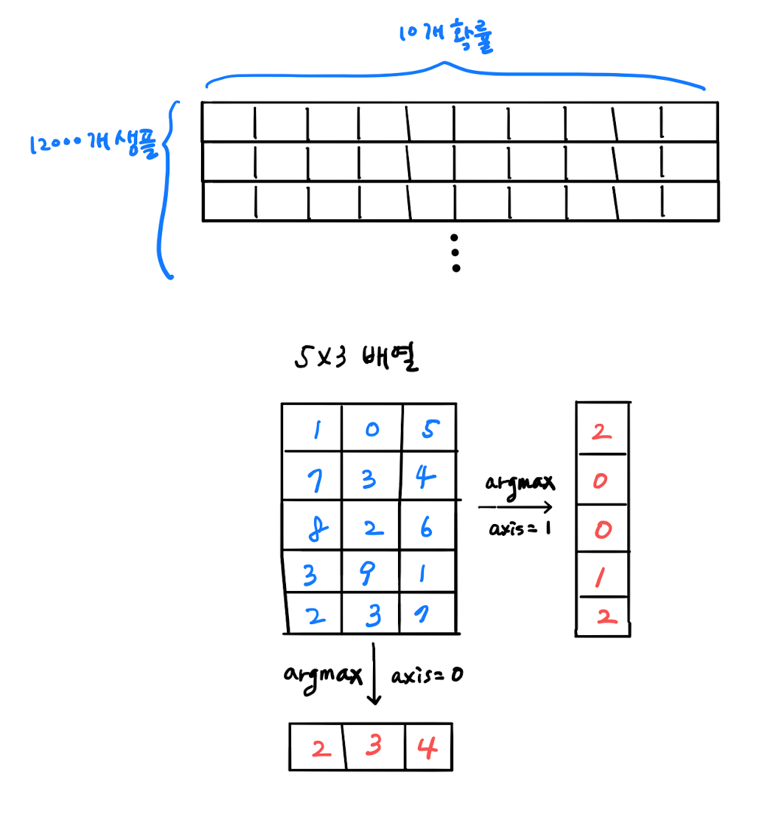


In [ ]:
# axis=1 이면 열을 따라 각 행의 최대값의 인덱스를 선택하고, axis=0이면 행을 따라 각 열의 최대값의 인덱스를 선택함.
# 그다음 라인은 argmax()로 고른 인덱스(val_labels)와 타킷(val_target)을 비교 -> 두 배열에서 각 위치의 값이 같이면 1, 다르면 0 (평균하면 정확도가 됨)

In [29]:
# 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도를 출력 해봄
model = keras.models.load_model('model-whole.keras') # load_model()저장된 케라스 파일 읽기

model.evaluate(val_scaled, val_target) # 같은 모델을 불러 들였기 때문에 위와 정확도가 같음

# 현 상태 분석 : 20번의 에포크 동안 모델을 훈련하여 검증 점수가 상능하는 지점을 확인
# 모델을 과대적합 되지 않은 에포크만큼 다시 훈련함
# 모델을 두번씩 훈련하지 않고 한번에 끝내는 방법을 연구 해보자. -> 케라스 콜백

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8858 - loss: 0.3147


[0.3194422721862793, 0.8836666941642761]

In [30]:
# 실험 2
# model.weights.h5 파일에서 새로운 모델을 만들어 바로 사용

# 콜백은 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체 keras.callbacks 패키지 아래에 있음
# fit() 메서드는 callbacks 매개변수에서 리스트로 전달하여 사용


model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ModelCheckpoint() 콜백은 기본적으로 에포크마다 모델을 저장함
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)
# save_best_only=True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장할 수 있음

model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])
# callbacks=[checkpoint_cb] 콜밸 매개변수에 리스트로 감싸서 전달
# 모델 훈련후 best-model.keras에 최상의 검증 점수를 낸 모델이 저장됨

In [31]:
# 저장될 파일 이름은 best-model.keras로 해보자
model = keras.models.load_model('best-model.keras') # load_model로 저장했던 값을 불러와 다시 예측 실행

model.evaluate(val_scaled, val_target)
# keras.callbacks.ModelCheckpoint 콜백이 가장 낮은 검증 점수의 모델을 자동으로 저장해 주었음
# 여전히 20번의 에포크 동안 훈련을 함
# 사실 검증 점수가 상승하기 시작하면 그 이후에는 과대 적합이 더 커지기 때문에 훈련을 계속할 필요가 없음.
# 이때 훈련을 종료하면 자원과 시간일 아낄 수 있음 -> 조기종료(early stopping)
# 조기 종료는 딥러닝 분야에 많이 사용하는 기법 (에포크의 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아주기도 함)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8876 - loss: 0.3225


[0.3229596018791199, 0.8865000009536743]

In [33]:
# 케라스에는 조기종료를 위한 EarlyStopping 콜백을 제공함
# 이 콜백의 patience 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 회수로 지정
# patience=2 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지
# restore_best_weights=True -> 가장 낮은 검증 솔실을 낸 모델 파리미터로 돌림

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)
# 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련을 중지할 수 있음.
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# 훈련을 중지하고 현재 모델의 파라미터를 최상의 파라미터로 되돌림
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])


In [34]:
print(early_stopping_cb.stopped_epoch)
# 11번에 에포크가 실행됨 -> 10번째가 최상의 모델임

11


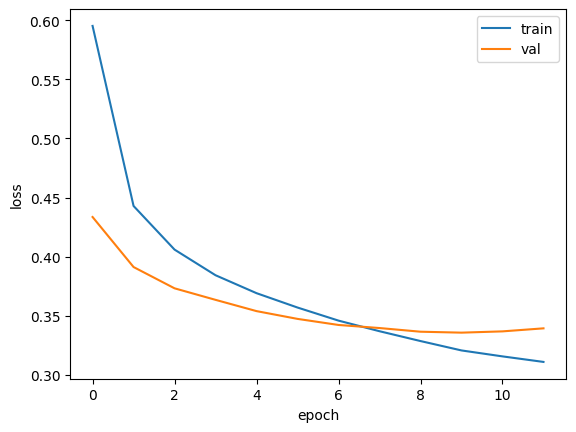

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# 결과는 항상 다를 수 있음을 명심
# 컴퓨터의 자원과 시간을 아끼고 콜백과 함꼐 사용하면 최상의 모델을 자동으로 저장해 준다는 것을 명심

In [36]:
model.evaluate(val_scaled, val_target) # 검증세트의 성능 확인

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8801 - loss: 0.3357


[0.3357095718383789, 0.8788333535194397]